<a href="https://colab.research.google.com/github/Juliana001/AnaliseDeDados_projetosPessoais/blob/main/projetoAnalisedeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados -Turbina Eólica


---

##Notebook de Juliana do N. Rocha
###Referência: https://www.youtube.com/watch?v=vgPPr9dFOZQ

#Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Lendo o arquivo/ tratamento inicial

In [ ]:
#Ler o arquivo
turbina = pd.read_csv('/content/T1.csv')

#Trocar o nome das colunas
turbina.columns = ['Data/hora', 'Potencia(kw)', 'Velocidade_vento(m/s)', 'Curva_potenciaTeorica(kwh)', 'DirecaoVento(°)']

#Caso fosse necessário a exclusão de uma coluna, seria feito da seguinte forma:
#del turbina['nomeDaColuna']

#alterar tipo de dado
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'], format='%d %m %Y %H:%M')

#Printar o cabeçalho (5 primeiras linhas) do dataframe
print(turbina.head())

            Data/hora  Potencia(kw)  Velocidade_vento(m/s)  \
0 2018-01-01 00:00:00    380.047791               5.311336   
1 2018-01-01 00:10:00    453.769196               5.672167   
2 2018-01-01 00:20:00    306.376587               5.216037   
3 2018-01-01 00:30:00    419.645905               5.659674   
4 2018-01-01 00:40:00    380.650696               5.577941   

   Curva_potenciaTeorica(kwh)  DirecaoVento(°)  
0                  416.328908       259.994904  
1                  519.917511       268.641113  
2                  390.900016       272.564789  
3                  516.127569       271.258087  
4                  491.702972       265.674286  


#Plotando os dados em um gráficos - Real

<Axes: xlabel='Velocidade_vento(m/s)', ylabel='Potencia(kw)'>

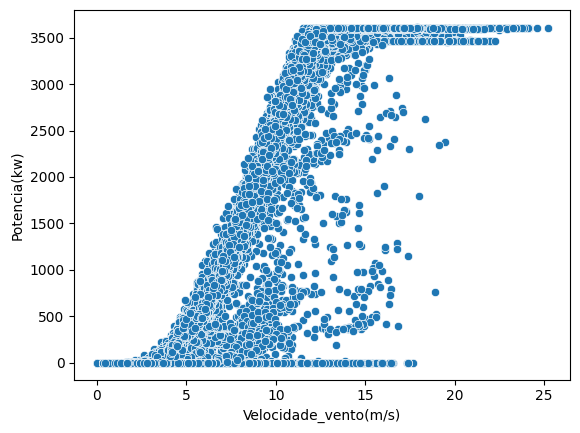

In [ ]:
sns.scatterplot(data=turbina, x= 'Velocidade_vento(m/s)', y='Potencia(kw)')

#Plotando os dados em um gráfico - teórico

<Axes: xlabel='Velocidade_vento(m/s)', ylabel='Curva_potenciaTeorica(kwh)'>

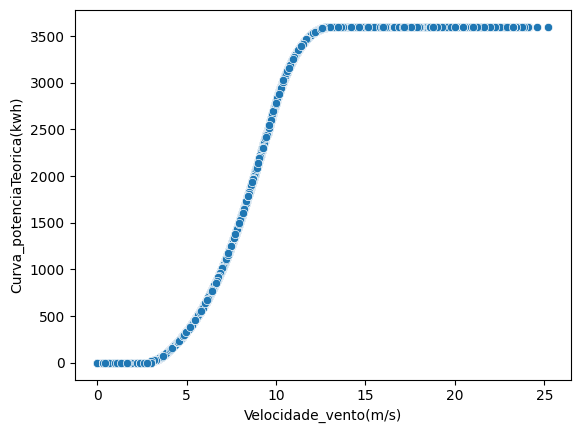

In [ ]:
sns.scatterplot(data=turbina, x= 'Velocidade_vento(m/s)', y='Curva_potenciaTeorica(kwh)')

#Criando limites aceitáveis

In [ ]:
pot_real = turbina['Potencia(kw)'].tolist()
pot_teo = turbina['Curva_potenciaTeorica(kwh)'].tolist()

pot_max=[]
pot_min=[]
dentro_limite = []

for potencia in pot_teo:
  pot_max.append(potencia*1.05)
  pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
  if potencia >= pot_min[p] and potencia <= pot_max[p]:
    dentro_limite.append('Dentro')
  elif potencia == 0:
    dentro_limite.append('Zero')
  else:
    dentro_limite.append('Fora')


print(len(pot_max), len(pot_min), len(pot_teo))
print("Pontos dentro do limite: ", dentro_limite.count('Dentro'))
print("Pontos fora do limite: ", dentro_limite.count('Fora'))
print("Pontos zerados: ", dentro_limite.count('Zero'))


50530 50530 50530
Pontos dentro do limite:  18841
Pontos fora do limite:  28192
Pontos zerados:  3497


#Adicionando dentro_limite ao dataframe

In [ ]:
turbina['DentroLimite']= dentro_limite
print(turbina.head())

            Data/hora  Potencia(kw)  Velocidade_vento(m/s)  \
0 2018-01-01 00:00:00    380.047791               5.311336   
1 2018-01-01 00:10:00    453.769196               5.672167   
2 2018-01-01 00:20:00    306.376587               5.216037   
3 2018-01-01 00:30:00    419.645905               5.659674   
4 2018-01-01 00:40:00    380.650696               5.577941   

   Curva_potenciaTeorica(kwh)  DirecaoVento(°) DentroLimite  
0                  416.328908       259.994904         Fora  
1                  519.917511       268.641113         Fora  
2                  390.900016       272.564789         Fora  
3                  516.127569       271.258087         Fora  
4                  491.702972       265.674286         Fora  


#Plotando o gráfico novamente

<Axes: xlabel='Velocidade_vento(m/s)', ylabel='Potencia(kw)'>

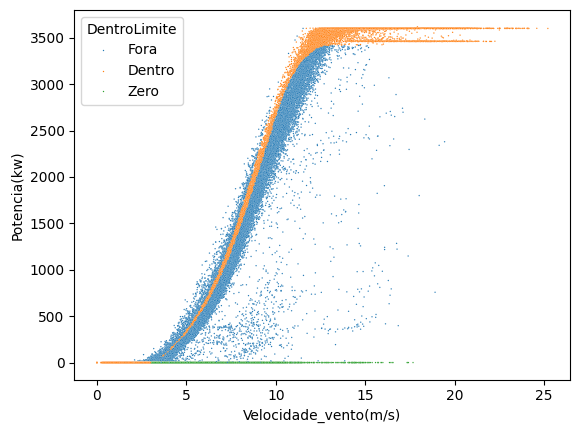

In [ ]:
sns.scatterplot(data=turbina, x= 'Velocidade_vento(m/s)', y='Potencia(kw)', hue='DentroLimite', s=1)